In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [231]:
file_path = '~/aiffel/AIFFEL_repo/netflix_titles.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [232]:
data = data.rename(columns = {'listed_in': 'genre'})
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [284]:
data = data.dropna(subset=['country'])

In [285]:
data_two = data[['country','genre']]
data_two

,country,genre
0,United States,Documentaries
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
4,India,"International TV Shows, Romantic TV Shows, TV ..."
7,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies"
8,United Kingdom,"British TV Shows, Reality TV"
...,...,...
8801,"United Arab Emirates, Jordan","Dramas, International Movies, Thrillers"
8802,United States,"Cult Movies, Dramas, Thrillers"
8804,United States,"Comedies, Horror Movies"
8805,United States,"Children & Family Movies, Comedies"


In [286]:
df_str = data_two.astype('string') # 문자열 타입으로 변경
df_str

,country,genre
0,United States,Documentaries
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
4,India,"International TV Shows, Romantic TV Shows, TV ..."
7,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies"
8,United Kingdom,"British TV Shows, Reality TV"
...,...,...
8801,"United Arab Emirates, Jordan","Dramas, International Movies, Thrillers"
8802,United States,"Cult Movies, Dramas, Thrillers"
8804,United States,"Comedies, Horror Movies"
8805,United States,"Children & Family Movies, Comedies"


In [236]:
df_str["country"] = df_str["country"].str.replace(" ", "") 
df_str["genre"] = df_str["genre"].str.replace(" ", "")

df_str

,country,genre
0,UnitedStates,Documentaries
1,SouthAfrica,"InternationalTVShows,TVDramas,TVMysteries"
4,India,"InternationalTVShows,RomanticTVShows,TVComedies"
7,"UnitedStates,Ghana,BurkinaFaso,UnitedKingdom,G...","Dramas,IndependentMovies,InternationalMovies"
8,UnitedKingdom,"BritishTVShows,RealityTV"
...,...,...
8801,"UnitedArabEmirates,Jordan","Dramas,InternationalMovies,Thrillers"
8802,UnitedStates,"CultMovies,Dramas,Thrillers"
8804,UnitedStates,"Comedies,HorrorMovies"
8805,UnitedStates,"Children&FamilyMovies,Comedies"


In [237]:
SouthKorea_df = df_str.query("country == 'SouthKorea'")
SouthKorea_df  # 해당하는 국가의 행만 추출

,country,genre
104,SouthKorea,"Kids'TV,KoreanTVShows"
124,SouthKorea,"Kids'TV,KoreanTVShows"
289,SouthKorea,"InternationalTVShows,RomanticTVShows,TVDramas"
456,SouthKorea,"InternationalTVShows,RomanticTVShows,TVComedies"
545,SouthKorea,"Kids'TV,KoreanTVShows"
...,...,...
8463,SouthKorea,"Comedies,Dramas,InternationalMovies"
8467,SouthKorea,"Action&Adventure,Dramas,InternationalMovies"
8575,SouthKorea,"InternationalTVShows,KoreanTVShows,RomanticTVS..."
8613,SouthKorea,"Action&Adventure,HorrorMovies,InternationalMovies"


In [238]:
SouthKorea_df['genre'].value_counts()

InternationalTVShows,KoreanTVShows,RomanticTVShows             63
CrimeTVShows,InternationalTVShows,KoreanTVShows                20
InternationalTVShows,KoreanTVShows,TVDramas                    18
Kids'TV,KoreanTVShows                                           9
InternationalTVShows,KoreanTVShows,TVComedies                   8
InternationalTVShows,RomanticTVShows,TVComedies                 7
Dramas,InternationalMovies,Thrillers                            7
Action&Adventure,Dramas,InternationalMovies                     7
InternationalTVShows,TVDramas                                   5
InternationalTVShows,KoreanTVShows,TVAction&Adventure           5
InternationalTVShows,RomanticTVShows,TVDramas                   5
CrimeTVShows,InternationalTVShows,TVDramas                      4
Dramas,InternationalMovies                                      3
InternationalTVShows,KoreanTVShows,Stand-UpComedy&TalkShows     3
InternationalTVShows,KoreanTVShows,RealityTV                    3
Internatio

In [239]:
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =='InternationalTVShows,KoreanTVShows,RomanticTVShows', 'Romance' , SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =='CrimeTVShows,InternationalTVShows,KoreanTVShows', 'Crime' , SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =='InternationalTVShows,KoreanTVShows,TVDramas','Drama', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="Kids'TV,KoreanTVShows",'Kids', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="InternationalTVShows,KoreanTVShows,TVComedies",'Comedy', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="InternationalTVShows,RomanticTVShows,TVComedies",'RomanticComedy', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="Dramas,InternationalMovies,Thrillers",'Thriller', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="Action&Adventure,Dramas,InternationalMovies",'Action&Adventure', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="InternationalTVShows,TVDramas",'Drama', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="InternationalTVShows,KoreanTVShows,TVAction&Adventure",'Action&Adventure', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="InternationalTVShows,RomanticTVShows,TVDramas",'Romance', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="CrimeTVShows,InternationalTVShows,TVDramas",'Crime', SouthKorea_df['genre'])
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'] =="InternationalMovies,Thrillers",'Thriller', SouthKorea_df['genre'])
SouthKorea_df

,country,genre
104,SouthKorea,Kids
124,SouthKorea,Kids
289,SouthKorea,Romance
456,SouthKorea,RomanticComedy
545,SouthKorea,Kids
...,...,...
8463,SouthKorea,"Comedies,Dramas,InternationalMovies"
8467,SouthKorea,Action&Adventure
8575,SouthKorea,Romance
8613,SouthKorea,"Action&Adventure,HorrorMovies,InternationalMovies"


In [240]:
SouthKorea_df['genre'] = np.where(SouthKorea_df['genre'].str.contains(','), np.nan, SouthKorea_df['genre'])
SouthKorea_df

,country,genre
104,SouthKorea,Kids
124,SouthKorea,Kids
289,SouthKorea,Romance
456,SouthKorea,RomanticComedy
545,SouthKorea,Kids
...,...,...
8463,SouthKorea,NaN
8467,SouthKorea,Action&Adventure
8575,SouthKorea,Romance
8613,SouthKorea,NaN


In [241]:
SouthKorea_df = SouthKorea_df.dropna()  # 결측치인 행 제거
SouthKorea_df

,country,genre
104,SouthKorea,Kids
124,SouthKorea,Kids
289,SouthKorea,Romance
456,SouthKorea,RomanticComedy
545,SouthKorea,Kids
...,...,...
8330,SouthKorea,Action&Adventure
8379,SouthKorea,Drama
8467,SouthKorea,Action&Adventure
8575,SouthKorea,Romance


In [242]:
SouthKorea_genre = SouthKorea_df.rename(columns = {'genre': 'SouthKorea_Genre'})
SouthKorea_genre

,country,SouthKorea_Genre
104,SouthKorea,Kids
124,SouthKorea,Kids
289,SouthKorea,Romance
456,SouthKorea,RomanticComedy
545,SouthKorea,Kids
...,...,...
8330,SouthKorea,Action&Adventure
8379,SouthKorea,Drama
8467,SouthKorea,Action&Adventure
8575,SouthKorea,Romance


In [289]:
SouthKorea_genre_count = SouthKorea_genre.groupby('SouthKorea_Genre',as_index=False).agg(genre_count = ('SouthKorea_Genre','count')).sort_values('genre_count', ascending = False )
SouthKorea_genre_count

,SouthKorea_Genre,genre_count
5,Romance,68
2,Crime,24
3,Drama,23
0,Action&Adventure,12
8,Thriller,10
4,Kids,9
1,Comedy,8
6,RomanticComedy,7
7,Stand-UpComedy,2


<AxesSubplot:xlabel='genre_count', ylabel='SouthKorea_Genre'>

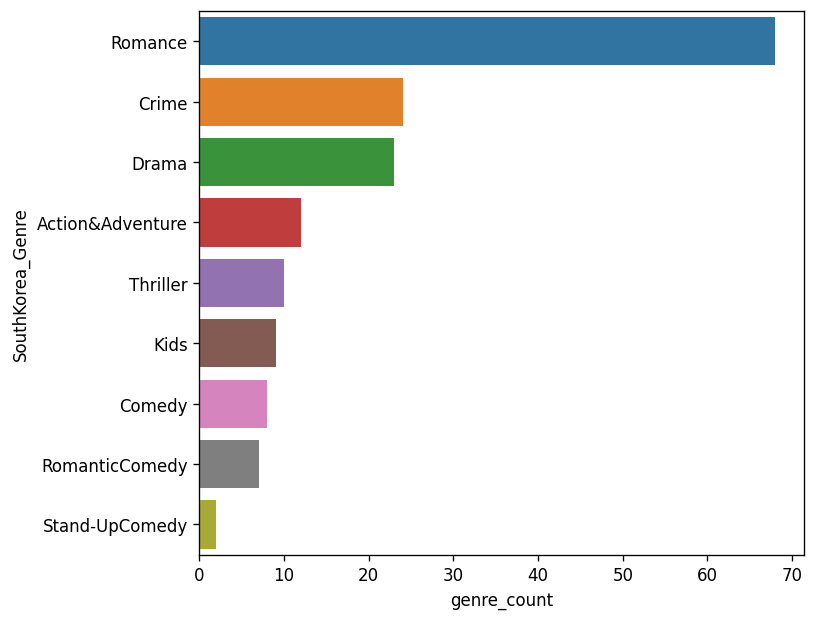

In [290]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = SouthKorea_genre_count, x='genre_count', y='SouthKorea_Genre') 

In [288]:
###

In [246]:
UnitedStates_genre = df_str.query("country == 'UnitedStates'")
UnitedStates_genre

,country,genre
0,UnitedStates,Documentaries
9,UnitedStates,"Comedies,Dramas"
15,UnitedStates,"TVComedies,TVDramas"
27,UnitedStates,Comedies
28,UnitedStates,"HorrorMovies,Sci-Fi&Fantasy"
...,...,...
8791,UnitedStates,"Comedies,Dramas,IndependentMovies"
8793,UnitedStates,"Children&FamilyMovies,Comedies"
8802,UnitedStates,"CultMovies,Dramas,Thrillers"
8804,UnitedStates,"Comedies,HorrorMovies"


In [247]:
UnitedStates_genre['genre'].value_counts()

Documentaries                                              249
Stand-UpComedy                                             209
Children&FamilyMovies,Comedies                              90
Dramas                                                      88
Comedies                                                    84
                                                          ... 
Docuseries,InternationalTVShows,Spanish-LanguageTVShows      1
IndependentMovies                                            1
Comedies,CultMovies,LGBTQMovies                              1
InternationalTVShows,RealityTV                               1
CultMovies,Dramas,Thrillers                                  1
Name: genre, Length: 310, dtype: Int64

In [248]:
UnitedStates_count = UnitedStates_genre.rename(columns = {'genre': 'UnitedStates_Genre'})
UnitedStates_count

,country,UnitedStates_Genre
0,UnitedStates,Documentaries
9,UnitedStates,"Comedies,Dramas"
15,UnitedStates,"TVComedies,TVDramas"
27,UnitedStates,Comedies
28,UnitedStates,"HorrorMovies,Sci-Fi&Fantasy"
...,...,...
8791,UnitedStates,"Comedies,Dramas,IndependentMovies"
8793,UnitedStates,"Children&FamilyMovies,Comedies"
8802,UnitedStates,"CultMovies,Dramas,Thrillers"
8804,UnitedStates,"Comedies,HorrorMovies"


In [249]:
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Docuseries', 'Documentaries' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Children&FamilyMovies,Comedies', 'Children&FamilyMovies' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Dramas,IndependentMovies', 'Dramas' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Comedies,Dramas,IndependentMovies', 'Comedies' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='TVComedies', 'Comedies' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Documentaries,Music&Musicals', 'Documentaries' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Comedies,RomanticMovies', 'RomanticComedies' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Dramas,Thrillers', 'Thrillers' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=="Kids'TV,TVComedies", "Kids'TV", UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='CrimeTVShows,Docuseries', 'Crime' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Action&Adventure,Comedies', 'Action&Adventure' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Documentaries,SportsMovies', 'Documentaries' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='HorrorMovies,Thrillers', 'HorrorMovies' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Dramas,RomanticMovies', 'Romance' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Action&Adventure,Sci-Fi&Fantasy', 'SF' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='TVDramas	', 'Dramas' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='TVComedies,TVDramas', 'Comedies' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Docuseries,Science&NatureTV', 'Documentaries' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Stand-UpComedy&TalkShows,TVComedies', 'Stand-UpComedy' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count['UnitedStates_Genre'] = np.where(UnitedStates_count['UnitedStates_Genre']=='Action&Adventure,Dramas', 'Action&Adventure' , UnitedStates_count['UnitedStates_Genre'])
UnitedStates_count


,country,UnitedStates_Genre
0,UnitedStates,Documentaries
9,UnitedStates,"Comedies,Dramas"
15,UnitedStates,Comedies
27,UnitedStates,Comedies
28,UnitedStates,"HorrorMovies,Sci-Fi&Fantasy"
...,...,...
8791,UnitedStates,Comedies
8793,UnitedStates,Children&FamilyMovies
8802,UnitedStates,"CultMovies,Dramas,Thrillers"
8804,UnitedStates,"Comedies,HorrorMovies"


In [250]:
###

In [251]:
UnitedStates_genre_count = UnitedStates_count.groupby('UnitedStates_Genre',as_index=False).agg(genre_count = ('UnitedStates_Genre','count')).sort_values('genre_count', ascending = False )
UnitedStates_genre_count = UnitedStates_genre_count.query("genre_count > 30")
UnitedStates_genre_count

,UnitedStates_Genre,genre_count
150,Documentaries,434
94,Comedies,234
257,Stand-UpComedy,233
44,Children&FamilyMovies,170
174,Dramas,162
0,Action&Adventure,125
218,Kids'TV,119
294,Thrillers,97
198,HorrorMovies,72
235,RealityTV,71


<AxesSubplot:xlabel='genre_count', ylabel='UnitedStates_Genre'>

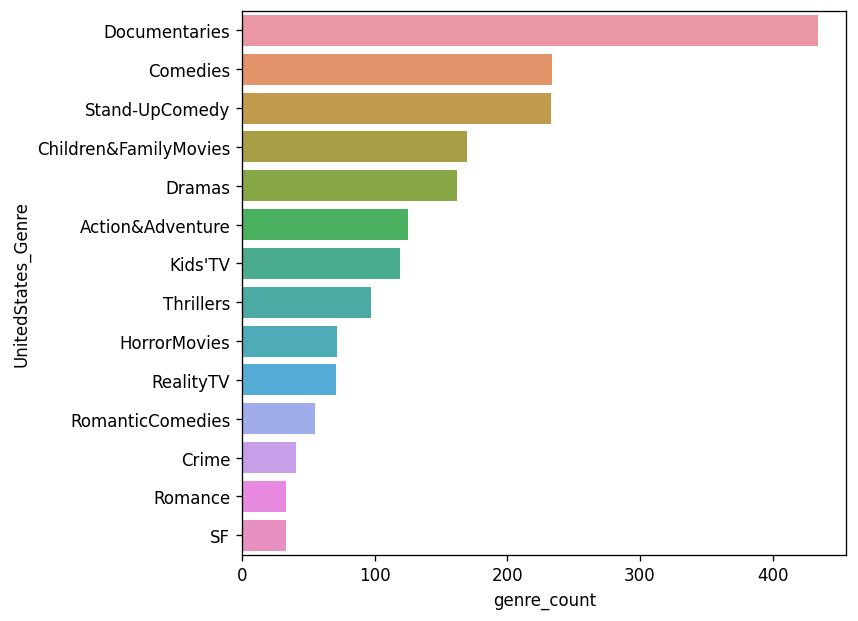

In [252]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = UnitedStates_genre_count, x='genre_count', y='UnitedStates_Genre') 

In [253]:
###

In [254]:
China_df = df_str.query("country == 'China'")
China_df

,country,genre
627,China,"AnimeSeries,InternationalTVShows,TeenTVShows"
905,China,"Action&Adventure,Dramas,InternationalMovies"
944,China,Action&Adventure
1080,China,"Action&Adventure,AnimeFeatures,InternationalMo..."
1084,China,"AnimeSeries,InternationalTVShows,RomanticTVShows"
...,...,...
8560,China,"InternationalTVShows,RomanticTVShows,TVComedies"
8576,China,"Comedies,InternationalMovies,RomanticMovies"
8588,China,"CrimeTVShows,InternationalTVShows,TVDramas"
8589,China,"Dramas,InternationalMovies,Thrillers"


In [255]:
China_df['genre'].value_counts()

InternationalTVShows,RomanticTVShows,TVDramas               8
InternationalTVShows,RomanticTVShows,TVComedies             7
Action&Adventure,InternationalMovies                        6
Comedies,Dramas,InternationalMovies                         4
Action&Adventure,Dramas,InternationalMovies                 3
InternationalTVShows,RomanticTVShows,TeenTVShows            3
InternationalTVShows,TVDramas                               3
Dramas,InternationalMovies,RomanticMovies                   2
Action&Adventure,Comedies,InternationalMovies               2
CrimeTVShows,InternationalTVShows,TVDramas                  2
Action&Adventure,InternationalMovies,Sci-Fi&Fantasy         2
InternationalTVShows,TVAction&Adventure,TVDramas            2
CrimeTVShows,InternationalTVShows,TVAction&Adventure        1
Action&Adventure                                            1
Action&Adventure,AnimeFeatures,InternationalMovies          1
AnimeSeries,InternationalTVShows,RomanticTVShows            1
Docuseri

In [256]:
China_df['genre'] = np.where(China_df['genre'] =='InternationalTVShows,RomanticTVShows,TVDramas', 'Romance' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='InternationalTVShows,RomanticTVShows,TVComedies','RomanticComedies',China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='Action&Adventure,InternationalMovies', 'Action&Adventure' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='Comedies,Dramas,InternationalMovies', 'Comedies' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='Action&Adventure,Dramas,InternationalMovies', 'Action&Adventure' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='InternationalTVShows,RomanticTVShows,TeenTVShows', 'Romance' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='InternationalTVShows,TVDramas', 'Dramas' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='Dramas,InternationalMovies,RomanticMovies', 'Romance' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='Action&Adventure,Comedies,InternationalMovies', 'Action&Adventure' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='CrimeTVShows,InternationalTVShows,TVDramas', 'Crime' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='Action&Adventure,InternationalMovies,Sci-Fi&Fantasy', 'SF' , China_df['genre'])
China_df['genre'] = np.where(China_df['genre'] =='InternationalTVShows,TVAction&Adventure,TVDramas', 'Action&Adventure' , China_df['genre'])
China_df

,country,genre
627,China,"AnimeSeries,InternationalTVShows,TeenTVShows"
905,China,Action&Adventure
944,China,Action&Adventure
1080,China,"Action&Adventure,AnimeFeatures,InternationalMo..."
1084,China,"AnimeSeries,InternationalTVShows,RomanticTVShows"
...,...,...
8560,China,RomanticComedies
8576,China,"Comedies,InternationalMovies,RomanticMovies"
8588,China,Crime
8589,China,"Dramas,InternationalMovies,Thrillers"


In [257]:
China_df['genre'] = np.where(China_df['genre'].str.contains(','), np.nan, China_df['genre'])
China_df

,country,genre
627,China,NaN
905,China,Action&Adventure
944,China,Action&Adventure
1080,China,NaN
1084,China,NaN
...,...,...
8560,China,RomanticComedies
8576,China,NaN
8588,China,Crime
8589,China,NaN


In [258]:
China_df = China_df.dropna()  # 결측치인 행 제거

In [259]:
China_genre = China_df.rename(columns = {'genre': 'China_Genre'})
China_genre

,country,China_Genre
905,China,Action&Adventure
944,China,Action&Adventure
1103,China,Action&Adventure
1184,China,Action&Adventure
1334,China,Action&Adventure
1345,China,Action&Adventure
2205,China,Action&Adventure
2469,China,Action&Adventure
2748,China,RomanticComedies
3087,China,Dramas


In [260]:
China_genre_count = China_genre.groupby('China_Genre',as_index=False).agg(genre_count = ('China_Genre','count')).sort_values('genre_count', ascending = False )
China_genre_count

,China_Genre,genre_count
0,Action&Adventure,14
5,Romance,13
6,RomanticComedies,7
1,Comedies,4
3,Dramas,3
2,Crime,2
7,SF,2
4,Kids'TV,1


<AxesSubplot:xlabel='genre_count', ylabel='China_Genre'>

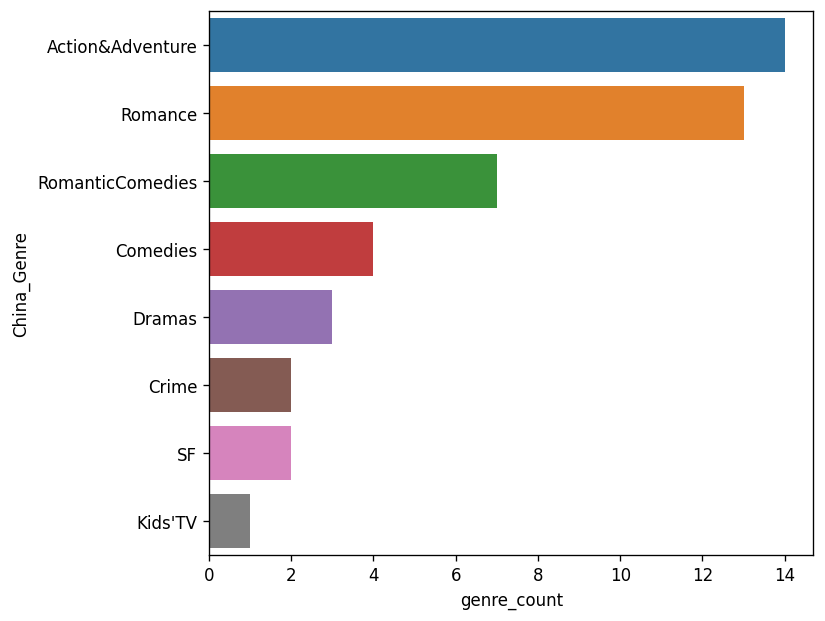

In [261]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = China_genre_count, x='genre_count', y='China_Genre') 

In [262]:
###

In [263]:
Japan_df = df_str.query("country == 'Japan'")
Japan_df

,country,genre
51,Japan,"Action&Adventure,AnimeFeatures,InternationalMo..."
52,Japan,"Action&Adventure,AnimeFeatures,InternationalMo..."
53,Japan,"Action&Adventure,AnimeFeatures,InternationalMo..."
54,Japan,"Action&Adventure,AnimeFeatures,InternationalMo..."
56,Japan,"Action&Adventure,AnimeFeatures,InternationalMo..."
...,...,...
7559,Japan,"Action&Adventure,AnimeFeatures,InternationalMo..."
7588,Japan,"AnimeSeries,Kids'TV"
7627,Japan,"AnimeSeries,CrimeTVShows"
7906,Japan,"AnimeSeries,InternationalTVShows"


In [264]:
Japan_df['genre'].value_counts()

AnimeSeries,InternationalTVShows                           75
Action&Adventure,AnimeFeatures,InternationalMovies         32
AnimeSeries,Kids'TV                                        12
AnimeSeries,InternationalTVShows,TeenTVShows                8
InternationalTVShows,TVDramas                               8
AnimeSeries,CrimeTVShows,InternationalTVShows               8
Dramas,InternationalMovies                                  7
AnimeSeries,InternationalTVShows,RomanticTVShows            7
AnimeFeatures,Children&FamilyMovies                         6
InternationalTVShows,RomanticTVShows,TVDramas               5
Action&Adventure,InternationalMovies                        5
AnimeSeries,InternationalTVShows,TVThrillers                4
AnimeSeries,InternationalTVShows,TVHorror                   3
AnimeSeries,RomanticTVShows,TeenTVShows                     3
InternationalTVShows,RealityTV,RomanticTVShows              3
InternationalTVShows,RealityTV                              3
Action&A

In [265]:
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,InternationalTVShows', 'AnimeSeries' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='Action&Adventure,AnimeFeatures,InternationalMovies', 'Action&Adventure' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =="AnimeSeries,Kids'TV", 'AnimeSeries' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='Action&Adventure,AnimeFeatures,InternationalMovies', 'Action&Adventure' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,InternationalTVShows,TeenTVShows', 'AnimeSeries' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='InternationalTVShows,TVDramas', 'Dramas' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,CrimeTVShows,InternationalTVShows', 'Crime' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='Dramas,InternationalMovies', 'Dramas' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,InternationalTVShows,RomanticTVShowss', 'Romance' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeFeatures,Children&FamilyMovies', 'Children&FamilyMovies' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='InternationalTVShows,RomanticTVShows,TVDramas', 'Romance' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='Action&Adventure,InternationalMovies', 'Action&Adventure' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,InternationalTVShows,TVThrillers', 'Thrillers' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,InternationalTVShows,TVHorror', 'Horror' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,RomanticTVShows,TeenTVShows', 'Romance' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='InternationalTVShows,RealityTV,RomanticTVShows', 'Romance' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,InternationalTVShows,RomanticTVShows', 'Romance' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='InternationalTVShows,RealityTV', 'Reality' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='CrimeTVShows,InternationalTVShows,TVDramas', 'Crime' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='Action&Adventure,AnimeFeatures,Sci-Fi&Fantasy', 'Action&Adventure' , Japan_df['genre'])
Japan_df['genre'] = np.where(Japan_df['genre'] =='AnimeSeries,TeenTVShows', 'AnimeSeries' , Japan_df['genre'])
Japan_df

,country,genre
51,Japan,Action&Adventure
52,Japan,Action&Adventure
53,Japan,Action&Adventure
54,Japan,Action&Adventure
56,Japan,Action&Adventure
...,...,...
7559,Japan,Action&Adventure
7588,Japan,AnimeSeries
7627,Japan,"AnimeSeries,CrimeTVShows"
7906,Japan,AnimeSeries


In [266]:
Japan_genre_count = Japan_df.groupby('genre',as_index=False).agg(genre_count = ('genre','count')).sort_values('genre_count', ascending = False )
Japan_genre_count = Japan_genre_count.query("genre_count > 2")
Japan_genre_count

,genre,genre_count
13,AnimeSeries,101
0,Action&Adventure,40
41,Romance,18
21,Dramas,15
18,Crime,11
17,Children&FamilyMovies,6
43,Thrillers,4
25,Horror,3
40,Reality,3


In [267]:
Japan_genre_count = Japan_genre_count.rename(columns = {'genre': 'Japan_Genre'})
Japan_genre_count

,Japan_Genre,genre_count
13,AnimeSeries,101
0,Action&Adventure,40
41,Romance,18
21,Dramas,15
18,Crime,11
17,Children&FamilyMovies,6
43,Thrillers,4
25,Horror,3
40,Reality,3


<AxesSubplot:xlabel='genre_count', ylabel='Japan_Genre'>

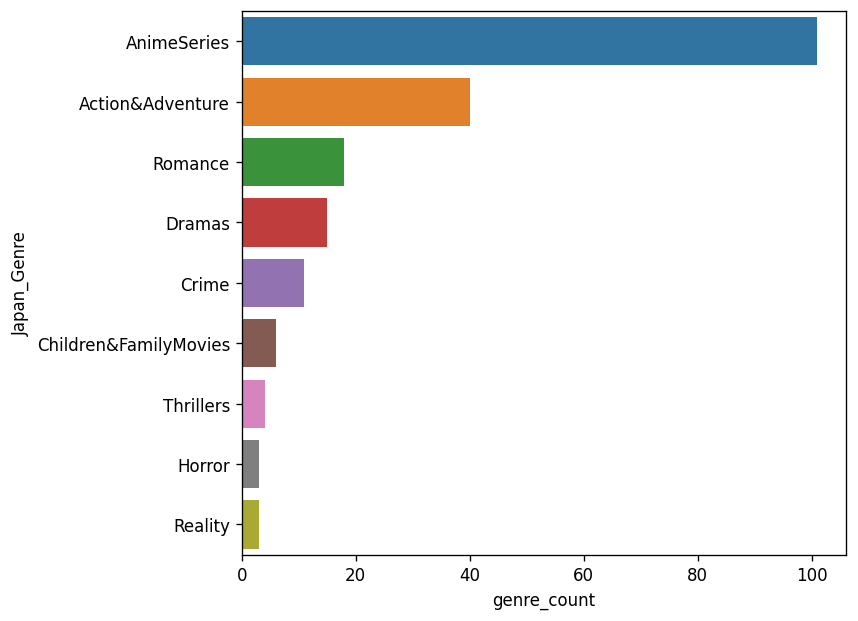

In [268]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = Japan_genre_count, x='genre_count', y='Japan_Genre') 

In [269]:
###

In [270]:
UnitedKingdom_df= df_str.query("country == 'UnitedKingdom'")
UnitedKingdom_df

,country,genre
8,UnitedKingdom,"BritishTVShows,RealityTV"
32,UnitedKingdom,"BritishTVShows,InternationalTVShows,TVComedies"
65,UnitedKingdom,Kids'TV
72,UnitedKingdom,"BritishTVShows,Docuseries,InternationalTVShows"
98,UnitedKingdom,"BritishTVShows,Kids'TV"
...,...,...
8740,UnitedKingdom,"BritishTVShows,Docuseries,Science&NatureTV"
8741,UnitedKingdom,"BritishTVShows,Docuseries,Science&NatureTV"
8744,UnitedKingdom,"Documentaries,InternationalMovies,SportsMovies"
8758,UnitedKingdom,"BritishTVShows,Docuseries"


In [271]:
UnitedKingdom_df.value_counts()[0:30]

country        genre                                              
UnitedKingdom  Documentaries                                          40
               BritishTVShows,Docuseries,InternationalTVShows         27
               BritishTVShows,InternationalTVShows,RealityTV          23
               Stand-UpComedy                                         18
               Documentaries,InternationalMovies                      18
               BritishTVShows,InternationalTVShows,TVComedies         17
               BritishTVShows,CrimeTVShows,InternationalTVShows       17
               BritishTVShows,Docuseries,Science&NatureTV             17
               BritishTVShows,CrimeTVShows,Docuseries                 16
               BritishTVShows,Kids'TV                                 11
               BritishTVShows,InternationalTVShows,TVDramas           11
               BritishTVShows,Docuseries                              10
               BritishTVShows,TVComedies                 

In [272]:
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,Docuseries,InternationalTVShows','Documentaries',UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,InternationalTVShows,RealityTV', 'Reality' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Documentaries,InternationalMovies', 'Documentaries' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,Docuseries,Science&NatureTV', 'Documentaries' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,InternationalTVShows,TVComedies', 'Comedies' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,CrimeTVShows,InternationalTVShows', 'Crime' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,CrimeTVShows,Docuseries', 'Crime' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,InternationalTVShows,TVDramas', 'Dramas' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =="BritishTVShows,Kids'TV", "Kids'TV" , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,Docuseries', 'Documentaries' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,TVComedies', 'Comedies' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Documentaries,InternationalMovies,SportsMovies', 'Documentaries' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Dramas,InternationalMovies', 'Dramas' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,RealityTV', 'Reality' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,InternationalTVShows,RomanticTVShows', 'Romance' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Documentaries,SportsMovies', 'Documentaries' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Documentaries,Music&Musicals', 'Documentaries' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Comedies,Dramas,InternationalMovies', 'Comedies' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Documentaries,InternationalMovies,Music&Musicals', 'Documentaries' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Dramas,IndependentMovies,InternationalMovies', 'Dramas' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =="BritishTVShows,Kids'TV,TVComedies", 'Comedies' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Children&FamilyMovies,Comedies', 'Comedies' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Dramas,InternationalMovies,Thrillers', 'Thrillers' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='BritishTVShows,CrimeTVShows,TVDramas', 'Crime' , UnitedKingdom_df['genre'])
UnitedKingdom_df['genre'] = np.where(UnitedKingdom_df['genre'] =='Docuseries', 'Documentaries' , UnitedKingdom_df['genre'])
UnitedKingdom_df

,country,genre
8,UnitedKingdom,Reality
32,UnitedKingdom,Comedies
65,UnitedKingdom,Kids'TV
72,UnitedKingdom,Documentaries
98,UnitedKingdom,Kids'TV
...,...,...
8740,UnitedKingdom,Documentaries
8741,UnitedKingdom,Documentaries
8744,UnitedKingdom,Documentaries
8758,UnitedKingdom,Documentaries


In [273]:
UnitedKingdom_count = UnitedKingdom_df.groupby('genre',as_index=False).agg(genre_count = ('genre','count')).sort_values('genre_count', ascending = False )
UnitedKingdom_count = UnitedKingdom_count.query("genre_count > 3")
UnitedKingdom_count

,genre,genre_count
39,Documentaries,136
26,Comedies,46
36,Crime,36
69,Reality,29
44,Dramas,27
76,Stand-UpComedy,18
65,Kids'TV,15
0,Action&Adventure,7
71,Romance,6
77,Thrillers,5


In [274]:
UnitedKingdom_genre = UnitedKingdom_count.rename(columns = {'genre': 'UnitedKingdom_Genre'})
UnitedKingdom_genre

,UnitedKingdom_Genre,genre_count
39,Documentaries,136
26,Comedies,46
36,Crime,36
69,Reality,29
44,Dramas,27
76,Stand-UpComedy,18
65,Kids'TV,15
0,Action&Adventure,7
71,Romance,6
77,Thrillers,5


<AxesSubplot:xlabel='genre_count', ylabel='UnitedKingdom_Genre'>

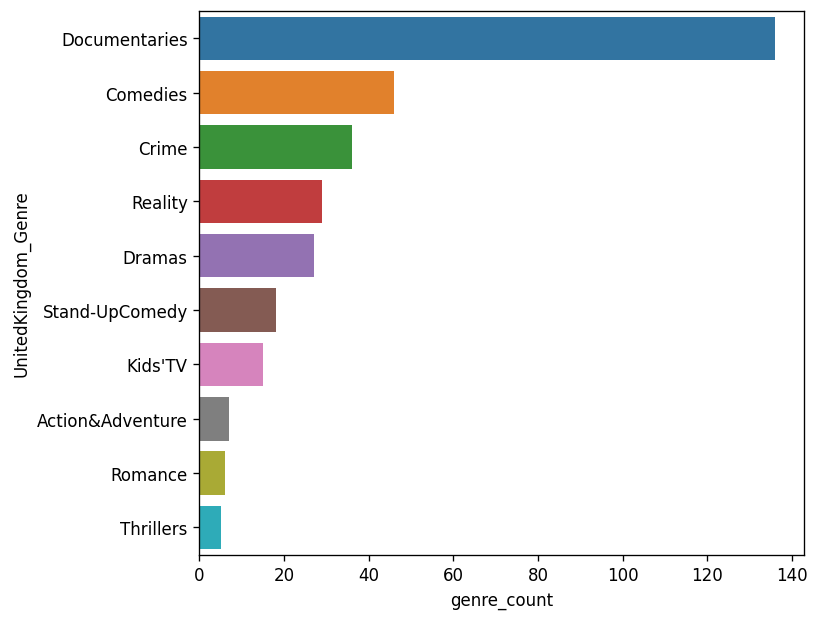

In [275]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = UnitedKingdom_genre, x='genre_count', y='UnitedKingdom_Genre')

In [276]:
###

In [277]:
France_df = df_str.query("country == 'France'")
France_df

,country,genre
91,France,"Documentaries,InternationalMovies"
188,France,"Comedies,InternationalMovies"
273,France,"CrimeTVShows,InternationalTVShows,TVDramas"
299,France,"HorrorMovies,IndependentMovies,InternationalMo..."
553,France,"CrimeTVShows,InternationalTVShows,TVDramas"
...,...,...
8218,France,"Dramas,InternationalMovies,RomanticMovies"
8370,France,"Documentaries,InternationalMovies"
8423,France,"Kids'TV,TVComedies"
8482,France,"InternationalTVShows,TVDramas,TVHorror"


In [278]:
France_df['genre'] = np.where(France_df['genre'] =='Documentaries,InternationalMovies','Documentaries',France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =='CrimeTVShows,InternationalTVShows,TVDramas','Crime',France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =='Dramas,IndependentMovies,InternationalMovies','Dramas',France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =='Comedies,Dramas,InternationalMovies','Comedies',France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =='Dramas,InternationalMovies','Dramas',France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="Kids'TV,TVComedies","Kids'TV",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="Action&Adventure,Documentaries,InternationalMovies","Action&Adventure",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="Documentaries,InternationalMovies,Music&Musicals","Documentaries",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="Documentaries,InternationalMovies,SportsMovies","Documentaries",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="Action&Adventure,Dramas,InternationalMovies ","Action&Adventure",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="Comedies,InternationalMovies","Comedies",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="CrimeTVShows,Docuseries,InternationalTVShows","Crime",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="InternationalTVShows,TVDramas,TVHorror","Horror",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="InternationalTVShows,TVComedies,TVDramas","Comedies",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="Action&Adventure,Dramas,InternationalMovies","Action&Adventure",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="InternationalTVShows,TVDramas,TVThrillers","Thrillers",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="CrimeTVShows,InternationalTVShows,TVAction&Adventure","Crime",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="InternationalTVShows,TVComedies","Comedies",France_df['genre'])
France_df['genre'] = np.where(France_df['genre'] =="Dramas,InternationalMovies,Thrillers","Thrillers",France_df['genre'])
France_df

,country,genre
91,France,Documentaries
188,France,Comedies
273,France,Crime
299,France,"HorrorMovies,IndependentMovies,InternationalMo..."
553,France,Crime
...,...,...
8218,France,"Dramas,InternationalMovies,RomanticMovies"
8370,France,Documentaries
8423,France,Kids'TV
8482,France,Horror


In [280]:
France_count = France_df.groupby('genre',as_index=False).agg(genre_count = ('genre','count')).sort_values('genre_count', ascending = False )
France_genre_count = France_count.query("genre_count > 2")
France_genre_count


,genre,genre_count
14,Documentaries,19
30,Kids'TV,16
6,Comedies,15
16,Dramas,14
12,Crime,13
0,Action&Adventure,8
31,Stand-UpComedy,5
32,Thrillers,4
19,Horror,3


In [282]:
France_genre_count = France_genre_count.rename(columns = {'genre': 'France_Genre'})
France_genre_count

,France_Genre,genre_count
14,Documentaries,19
30,Kids'TV,16
6,Comedies,15
16,Dramas,14
12,Crime,13
0,Action&Adventure,8
31,Stand-UpComedy,5
32,Thrillers,4
19,Horror,3


<AxesSubplot:xlabel='genre_count', ylabel='France_Genre'>

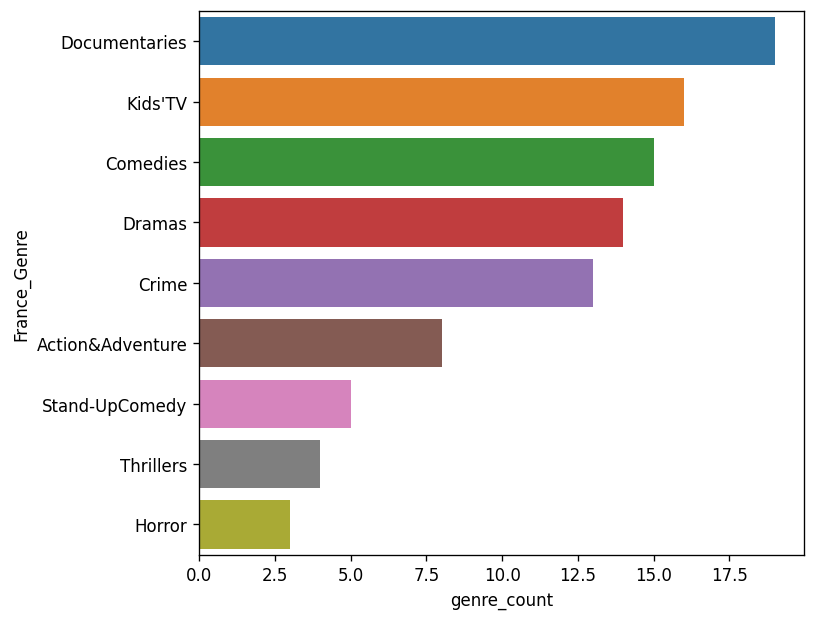

In [283]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = France_genre_count, x='genre_count', y='France_Genre')